In [4]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# MPC import
import numpy as np
import matplotlib.pyplot as plt
from LinearMPC_template.MPCVelControl import MPCVelControl
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis
from src.vel_rocket_vis import plot_static_states_inputs

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

Subsystem x: 

Input upper bounds are [0.26179939]
Input lower bounds are [-0.26179939]
State upper bounds are [       inf 0.17453293        inf]
State lower bounds are [       -inf -0.17453293        -inf] 

Not yet convgerged at iteration 1
Not yet convgerged at iteration 2
Not yet convgerged at iteration 3
Not yet convgerged at iteration 4
Not yet convgerged at iteration 5
Not yet convgerged at iteration 6
Not yet convgerged at iteration 7
Not yet convgerged at iteration 8
Maximum invariant set found after 9 iterations !

Subsystem y: 

Input upper bounds are [0.26179939]
Input lower bounds are [-0.26179939]
State upper bounds are [       inf 0.17453293        inf]
State lower bounds are [       -inf -0.17453293        -inf] 

Not yet convgerged at iteration 1
Not yet convgerged at iteration 2
Not yet convgerged at iteration 3
Not yet convgerged at iteration 4
Not yet convgerged at iteration 5
Not yet convgerged at iteration 6
Not yet convgerged at iteration 7
Not yet convgerged at 

c:\Users\vince\anaconda3\envs\mpc2025\Lib\site-packages\cvxpy\problems\problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(



Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
 State alpha violation: -0.17 < -0.17, 
 State beta violation: 0.17 > 0.17, 
Simulating time 0.30: 
Simulating time 0.35: 
 State alpha violation: -0.17 < -0.17, 
 State beta violation: 0.17 > 0.17, 
Simulating time 0.40: 
Simulating time 0.45: 
 State alpha violation: -0.17 < -0.17, 
 State beta violation: 0.17 > 0.17, 
Simulating time 0.50: 
Simulating time 0.55: 
 State alpha violation: -0.17 < -0.17, 
 State beta violation: 0.17 > 0.17, 
Simulating time 0.60: 
Simulating time 0.65: 
 State alpha violation: -0.17 < -0.17, 
 State beta violation: 0.17 > 0.17, 
Simulating time 0.70: 
Simulating time 0.75: 
Simulating time 0.80: 
Simulating time 0.85: 
Simulating time 0.90: 
Simulating time 0.95: 
Simulating time 1.00: 
Simulating time 1.05: 
Simulating time 1.10: 
Simulating time 1.15: 
Simulating time 1.20: 
 State alpha violation: -0.17 < -0.17, 
 State beta violation:

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=199, step=2), IntSlider(value=0…

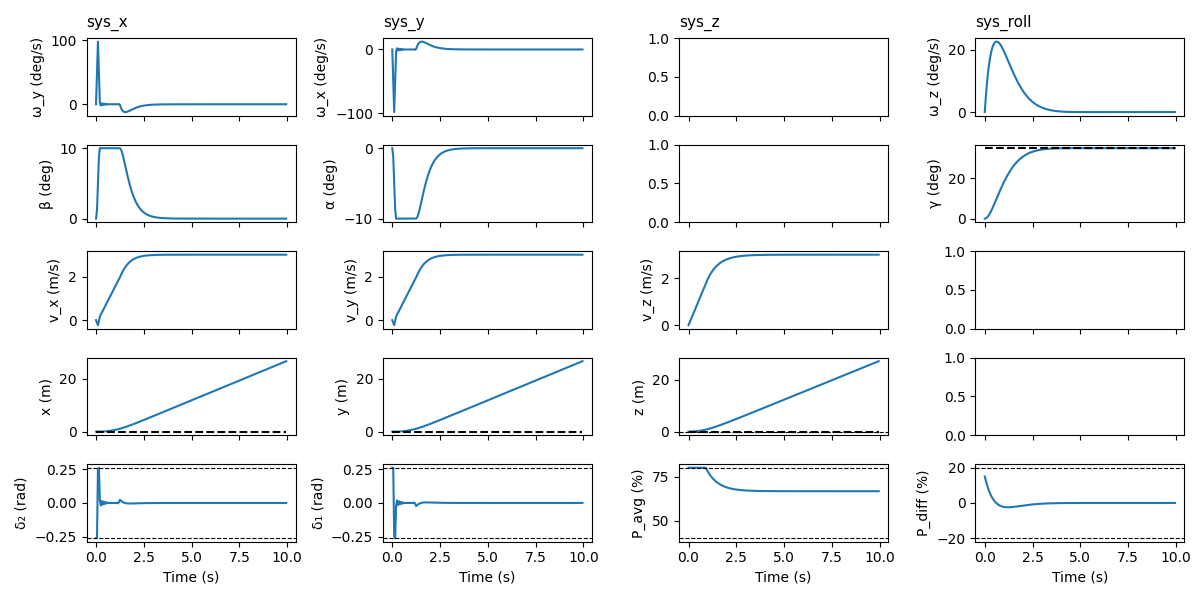

In [ ]:
Ts = 0.05
sim_time = 10.0
H = 6.0

#x0 definition : completely stationnary
x0_full = np.zeros(12)

#x_target definition : 3 m/s velocities and 35° roll
# Note : 
# 1. x_target already re-shaped from (n,) to (n x N_cl + 1 in simulate_control)
# 2. position targets set at 0. This does NOT lead to any problem at this point because the method mpc.get_u() always keeps position states at 0 and so this target is always fullfilled
#    i.e. it is an equilibrium if states not taken into account.

omega_x_target = 0; omega_y_target = 0; omega_z_target = 0; alpha_target = 0; beta_target = 0; gamma_target = np.deg2rad(35); v_x_target = 3; v_y_target = 3; v_z_target = 3
x_target = np.array([omega_x_target, omega_y_target, omega_z_target, alpha_target, beta_target, gamma_target, v_x_target, v_y_target, v_z_target, 0, 0, 0]) 

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

# u_target = u_s, so no need to specify it (see goodnotes)

# simulation
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(
    mpc, sim_time, H, x0_full, x_target=x_target, method="linear"
)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(
    t_cl[:-1],
    x_cl[:, :-1],
    u_cl,
    Ref=x_target.reshape(-1, 1).repeat(u_cl.shape[1], axis=1),
    T_ol=t_ol[..., :-1],
    X_ol=x_ol,
    U_ol=u_ol,
)

T = t_cl[:-1]
X = x_cl[:, :-1]
U = u_cl
ref = x_target

plot_static_states_inputs(T, X, U, ref)